<a href="https://colab.research.google.com/github/nbrrawal/DIY_PROEJCTS/blob/master/MLOPs_using_databricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [1]:
import pandas as pd
wind_farm_data = pd.read_csv("https://github.com/dbczumar/model-registry-demo-notebook/raw/master/dataset/windfarm_data.csv", index_col=0)

def get_training_data():
  training_data = pd.DataFrame(wind_farm_data["2014-01-01":"2018-01-01"])
  X = training_data.drop(columns="power")
  y = training_data["power"]
  return X, y

def get_validation_data():
  validation_data = pd.DataFrame(wind_farm_data["2018-01-01":"2019-01-01"])
  X = validation_data.drop(columns="power")
  y = validation_data["power"]
  return X, y

def get_weather_and_forecast():
  format_date = lambda pd_date : pd_date.date().strftime("%Y-%m-%d")
  today = pd.Timestamp('today').normalize()
  week_ago = today - pd.Timedelta(days=5)
  week_later = today + pd.Timedelta(days=5)

  past_power_output = pd.DataFrame(wind_farm_data)[format_date(week_ago):format_date(today)]
  weather_and_forecast = pd.DataFrame(wind_farm_data)[format_date(week_ago):format_date(week_later)]
  if len(weather_and_forecast) < 10:
    past_power_output = pd.DataFrame(wind_farm_data).iloc[-10:-5]
    weather_and_forecast = pd.DataFrame(wind_farm_data).iloc[-10:]

  return weather_and_forecast.drop(columns="power"), past_power_output["power"]


In [2]:
wind_farm_data["2019-01-01":"2019-01-14"]

,temperature_00,wind_direction_00,wind_speed_00,temperature_08,wind_direction_08,wind_speed_08,temperature_16,wind_direction_16,wind_speed_16,power
2019-01-01,8.875944,97.246960,11.665322,11.955358,98.636955,12.240791,14.668171,112.411930,9.737414,8509.6200
2019-01-02,15.183593,150.793730,10.765375,11.806581,202.014570,5.050459,8.744499,299.835420,6.469718,3876.5240
2019-01-03,5.572408,278.278230,2.968834,8.377396,98.699100,7.120559,9.474814,200.089770,1.316572,1511.1980
2019-01-04,7.883471,83.243490,1.943103,10.387258,147.142290,2.183379,10.536873,318.377930,2.621120,256.9488
2019-01-05,8.764894,305.704250,5.041509,8.271966,291.500180,4.422956,7.382129,113.804474,4.078743,1014.6314
2019-01-06,5.438333,106.043320,5.787299,7.966585,139.703280,2.067099,6.946286,285.241820,2.774709,859.2375
2019-01-07,4.202758,207.217350,2.983574,6.853256,112.100510,7.334027,8.428836,112.508860,9.337582,3766.5713
2019-01-08,7.556848,106.699104,9.850532,9.393202,100.567024,10.189929,10.031277,99.752014,8.621423,6999.7627
2019-01-09,7.387094,98.269590,8.638614,9.839335,98.169464,8.310448,10.385242,102.197290,3.762180,3924.3154
2019-01-10,7.586321,213.040680,1.303631,9.785772,91.479225,3.234444,9.988096,110.400520,7.184761,1593.0924


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [5]:
def train_keras_model(X, y):

  model = Sequential()
  model.add(Dense(100, input_shape=(X_train.shape[-1],), activation="relu", name="hidden_layer"))
  model.add(Dense(1))
  model.compile(loss="mse", optimizer="adam")

  model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=.2)
  return model

In [8]:
import mlflow
import mlflow.keras
import mlflow.tensorflow

X_train, y_train = get_training_data()


In [9]:
with mlflow.start_run():
  # Automatically capture the model's parameters, metrics, artifacts,
  # and source code with the `autolog()` function
  mlflow.tensorflow.autolog()

  train_keras_model(X_train, y_train)
  run_id = mlflow.active_run().info.run_id

2023/10/08 02:30:50 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/100
 1/19 [>.............................] - ETA: 43s - loss: 10105638.0000

19/19 [==============================] - 4s 66ms/step - loss: 10386727.0000 - val_loss: 8083498.0000
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 9936366.0000 - val_loss: 7662935.5000
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 9453510.0000 - val_loss: 7188591.0000
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 8905070.0000 - val_loss: 6667642.0000
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 8304195.5000 - val_loss: 6127389.5000
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 7687518.0000 - val_loss: 5603740.5000
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 7086239.0000 - val_loss: 5156764.5000
Epoch 8/100
19/19 [==============================] - 0s 7ms/step - loss: 6556790.0000 - val_loss: 4814241.0000
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 6131283.5000 - val_loss: 4598693.0000
Epoch 10/10

2023/10/08 02:31:13 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2023/10/08 02:31:13 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/10/08 02:31:22 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.16+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.16' without the local version label 

In [10]:
model_name = "power-forecasting-model-prod" # Replace this with the name of your registered model, if necessary.


In [11]:
import mlflow

# The default path where the MLflow autologging function stores the model
artifact_path = "model"
model_uri = "runs:/{run_id}/{artifact_path}".format(run_id=run_id, artifact_path=artifact_path)

model_details = mlflow.register_model(model_uri=model_uri, name=model_name)

Successfully registered model 'power-forecasting-model-prod'.
2023/10/08 04:28:40 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: power-forecasting-model-prod, version 1
Created version '1' of model 'power-forecasting-model-prod'.


In [12]:
import time
from mlflow.tracking.client import MlflowClient
from mlflow.entities.model_registry.model_version_status import ModelVersionStatus

def wait_until_ready(model_name, model_version):
  client = MlflowClient()
  for _ in range(10):
    model_version_details = client.get_model_version(
      name=model_name,
      version=model_version,
    )
    status = ModelVersionStatus.from_string(model_version_details.status)
    print("Model status: %s" % ModelVersionStatus.to_string(status))
    if status == ModelVersionStatus.READY:
      break
    time.sleep(1)

wait_until_ready(model_details.name, model_details.version)

Model status: READY


In [13]:
from mlflow.tracking.client import MlflowClient

client = MlflowClient()
client.update_registered_model(
  name=model_details.name,
  description="This model forecasts the power output of a wind farm based on weather data. The weather data consists of three features: wind speed, wind direction, and air temperature."
)

<RegisteredModel: aliases={}, creation_timestamp=1696739320368, description=('This model forecasts the power output of a wind farm based on weather data. '
 'The weather data consists of three features: wind speed, wind direction, and '
 'air temperature.'), last_updated_timestamp=1696739340234, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1696739320374, current_stage='None', description=None, last_updated_timestamp=1696739320374, name='power-forecasting-model-prod', run_id='f78dc11f6a8f44e5ab703e7df1f97cc5', run_link=None, source='file:///content/mlruns/0/f78dc11f6a8f44e5ab703e7df1f97cc5/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>], name='power-forecasting-model-prod', tags={}>

In [14]:
client.update_model_version(
  name=model_details.name,
  version=model_details.version,
  description="This model version was built using TensorFlow Keras. It is a feed-forward neural network with one hidden layer."
)

<ModelVersion: aliases=[], creation_timestamp=1696739320374, current_stage='None', description=('This model version was built using TensorFlow Keras. It is a feed-forward '
 'neural network with one hidden layer.'), last_updated_timestamp=1696739347544, name='power-forecasting-model-prod', run_id='f78dc11f6a8f44e5ab703e7df1f97cc5', run_link=None, source='file:///content/mlruns/0/f78dc11f6a8f44e5ab703e7df1f97cc5/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [15]:
client.transition_model_version_stage(
  name=model_details.name,
  version=model_details.version,
  stage='Production',
)

<ModelVersion: aliases=[], creation_timestamp=1696739320374, current_stage='Production', description=('This model version was built using TensorFlow Keras. It is a feed-forward '
 'neural network with one hidden layer.'), last_updated_timestamp=1696739366389, name='power-forecasting-model-prod', run_id='f78dc11f6a8f44e5ab703e7df1f97cc5', run_link=None, source='file:///content/mlruns/0/f78dc11f6a8f44e5ab703e7df1f97cc5/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [16]:
model_version_details = client.get_model_version(
  name=model_details.name,
  version=model_details.version,
)
print("The current model stage is: '{stage}'".format(stage=model_version_details.current_stage))

The current model stage is: 'Production'


In [17]:
latest_version_info = client.get_latest_versions(model_name, stages=["Production"])
latest_production_version = latest_version_info[0].version
print("The latest production version of the model '%s' is '%s'." % (model_name, latest_production_version))

The latest production version of the model 'power-forecasting-model-prod' is '1'.


In [18]:
import mlflow.pyfunc

model_version_uri = "models:/{model_name}/1".format(model_name=model_name)

print("Loading registered model version from URI: '{model_uri}'".format(model_uri=model_version_uri))
model_version_1 = mlflow.pyfunc.load_model(model_version_uri)

Loading registered model version from URI: 'models:/power-forecasting-model-prod/1'


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [19]:
model_production_uri = "models:/{model_name}/production".format(model_name=model_name)

print("Loading registered model version from URI: '{model_uri}'".format(model_uri=model_production_uri))
model_production = mlflow.pyfunc.load_model(model_production_uri)

Loading registered model version from URI: 'models:/power-forecasting-model-prod/production'


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [20]:
def plot(model_name, model_stage, model_version, power_predictions, past_power_output):
  import pandas as pd
  import matplotlib.dates as mdates
  from matplotlib import pyplot as plt
  index = power_predictions.index
  fig = plt.figure(figsize=(11, 7))
  ax = fig.add_subplot(111)
  ax.set_xlabel("Date", size=20, labelpad=20)
  ax.set_ylabel("Power\noutput\n(MW)", size=20, labelpad=60, rotation=0)
  ax.tick_params(axis='both', which='major', labelsize=17)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
  ax.plot(index[:len(past_power_output)], past_power_output, label="True", color="red", alpha=0.5, linewidth=4)
  ax.plot(index, power_predictions.squeeze(), "--", label="Predicted by '%s'\nin stage '%s' (Version %d)" % (model_name, model_stage, model_version), color="blue", linewidth=3)
  ax.set_ylim(ymin=0, ymax=max(3500, int(max(power_predictions.values) * 1.3)))
  ax.legend(fontsize=14)
  plt.title("Wind farm power output and projections", size=24, pad=20)
  plt.tight_layout()
  display(plt.show())

def forecast_power(model_name, model_stage):
  from mlflow.tracking.client import MlflowClient
  client = MlflowClient()
  model_version = client.get_latest_versions(model_name, stages=[model_stage])[0].version
  model_uri = "models:/{model_name}/{model_stage}".format(model_name=model_name, model_stage=model_stage)
  model = mlflow.pyfunc.load_model(model_uri)
  weather_data, past_power_output = get_weather_and_forecast()
  power_predictions = pd.DataFrame(model.predict(weather_data))
  power_predictions.index = pd.to_datetime(weather_data.index)
  print(power_predictions)
  plot(model_name, model_stage, int(model_version), power_predictions, past_power_output)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


1/1 [==============================] - 0s 489ms/step
                      0
2020-12-22  1797.223267
2020-12-23  2173.503418
2020-12-24  3117.858643
2020-12-25  4034.729736
2020-12-26  3806.087891
2020-12-27  2455.997314
2020-12-28  3418.062744
2020-12-29  4674.828125
2020-12-30  2839.908691
2020-12-31  2037.289429


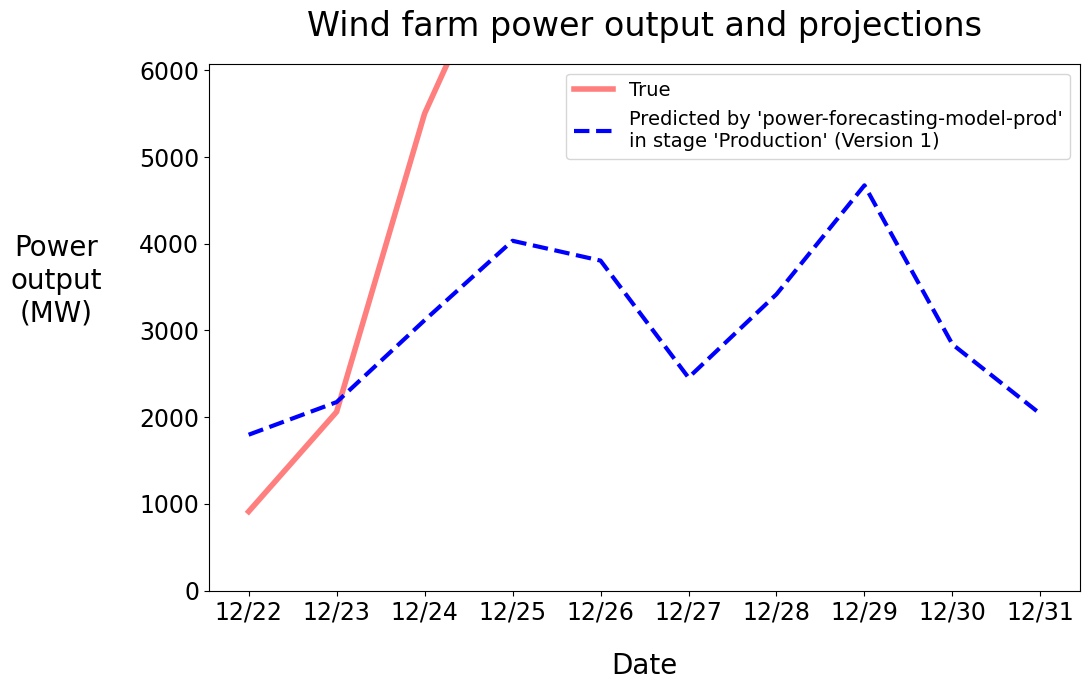

None

In [21]:
forecast_power(model_name, "Production")


In [22]:
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

with mlflow.start_run():
  n_estimators = 300
  mlflow.log_param("n_estimators", n_estimators)

  rand_forest = RandomForestRegressor(n_estimators=n_estimators)
  rand_forest.fit(X_train, y_train)

  val_x, val_y = get_validation_data()
  mse = mean_squared_error(rand_forest.predict(val_x), val_y)
  print("Validation MSE: %d" % mse)
  mlflow.log_metric("mse", mse)

  # Specify the `registered_model_name` parameter of the `mlflow.sklearn.log_model()`
  # function to register the model with the MLflow Model Registry. This automatically
  # creates a new model version
  mlflow.sklearn.log_model(
    sk_model=rand_forest,
    artifact_path="sklearn-model",
    registered_model_name=model_name,
  )

Validation MSE: 44586


Registered model 'power-forecasting-model-prod' already exists. Creating a new version of this model...
2023/10/08 04:31:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: power-forecasting-model-prod, version 2
Created version '2' of model 'power-forecasting-model-prod'.


In [23]:
from mlflow.tracking.client import MlflowClient
client = MlflowClient()

model_version_infos = client.search_model_versions("name = '%s'" % model_name)
new_model_version = max([model_version_info.version for model_version_info in model_version_infos])

In [24]:
wait_until_ready(model_name, new_model_version)

Model status: READY


In [25]:
client.update_model_version(
  name=model_name,
  version=new_model_version,
  description="This model version is a random forest containing 100 decision trees that was trained in scikit-learn."
)

<ModelVersion: aliases=[], creation_timestamp=1696739466571, current_stage='None', description=('This model version is a random forest containing 100 decision trees that was '
 'trained in scikit-learn.'), last_updated_timestamp=1696739486306, name='power-forecasting-model-prod', run_id='753030b59d42475283280f59b866e9bf', run_link=None, source='file:///content/mlruns/0/753030b59d42475283280f59b866e9bf/artifacts/sklearn-model', status='READY', status_message=None, tags={}, user_id=None, version=2>

In [26]:
client.transition_model_version_stage(
  name=model_name,
  version=new_model_version,
  stage="Staging",
)

<ModelVersion: aliases=[], creation_timestamp=1696739466571, current_stage='Staging', description=('This model version is a random forest containing 100 decision trees that was '
 'trained in scikit-learn.'), last_updated_timestamp=1696739494013, name='power-forecasting-model-prod', run_id='753030b59d42475283280f59b866e9bf', run_link=None, source='file:///content/mlruns/0/753030b59d42475283280f59b866e9bf/artifacts/sklearn-model', status='READY', status_message=None, tags={}, user_id=None, version=2>

                      0
2020-12-22  1187.810426
2020-12-23  2330.238834
2020-12-24  5357.076333
2020-12-25  7695.157310
2020-12-26  6892.706193
2020-12-27  2791.351183
2020-12-28  5117.249720
2020-12-29  8731.169256
2020-12-30  3812.037982
2020-12-31  1469.195293


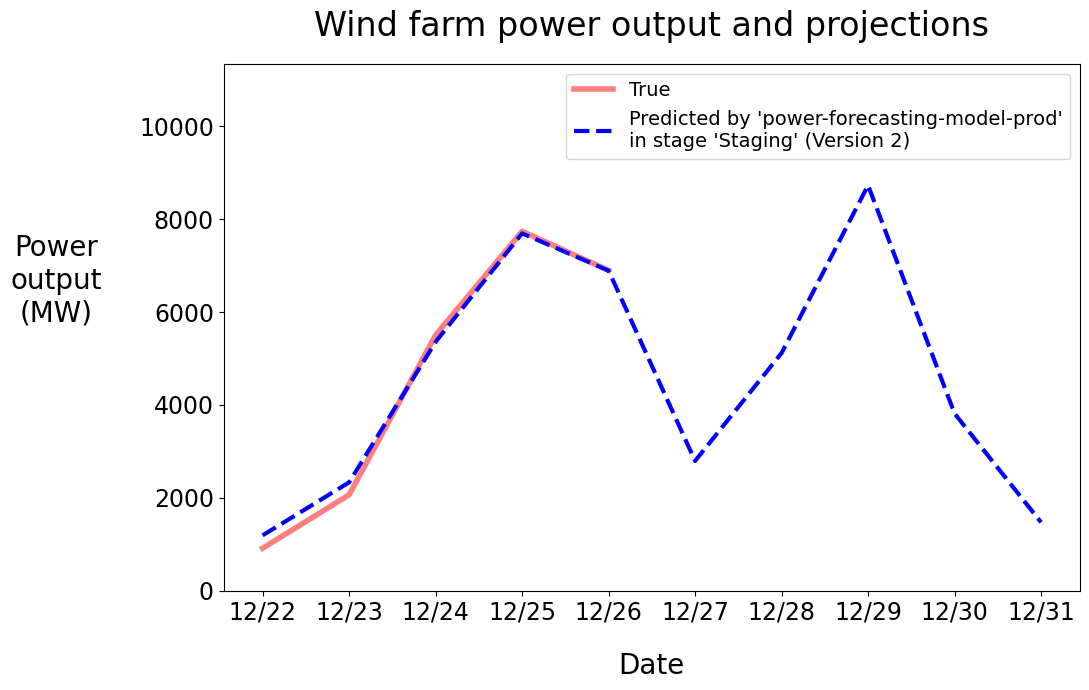

None

In [27]:
forecast_power(model_name, "Staging")

In [28]:
client.transition_model_version_stage(
  name=model_name,
  version=new_model_version,
  stage="Production",
)

<ModelVersion: aliases=[], creation_timestamp=1696739466571, current_stage='Production', description=('This model version is a random forest containing 100 decision trees that was '
 'trained in scikit-learn.'), last_updated_timestamp=1696739522261, name='power-forecasting-model-prod', run_id='753030b59d42475283280f59b866e9bf', run_link=None, source='file:///content/mlruns/0/753030b59d42475283280f59b866e9bf/artifacts/sklearn-model', status='READY', status_message=None, tags={}, user_id=None, version=2>

                      0
2020-12-22  1187.810426
2020-12-23  2330.238834
2020-12-24  5357.076333
2020-12-25  7695.157310
2020-12-26  6892.706193
2020-12-27  2791.351183
2020-12-28  5117.249720
2020-12-29  8731.169256
2020-12-30  3812.037982
2020-12-31  1469.195293


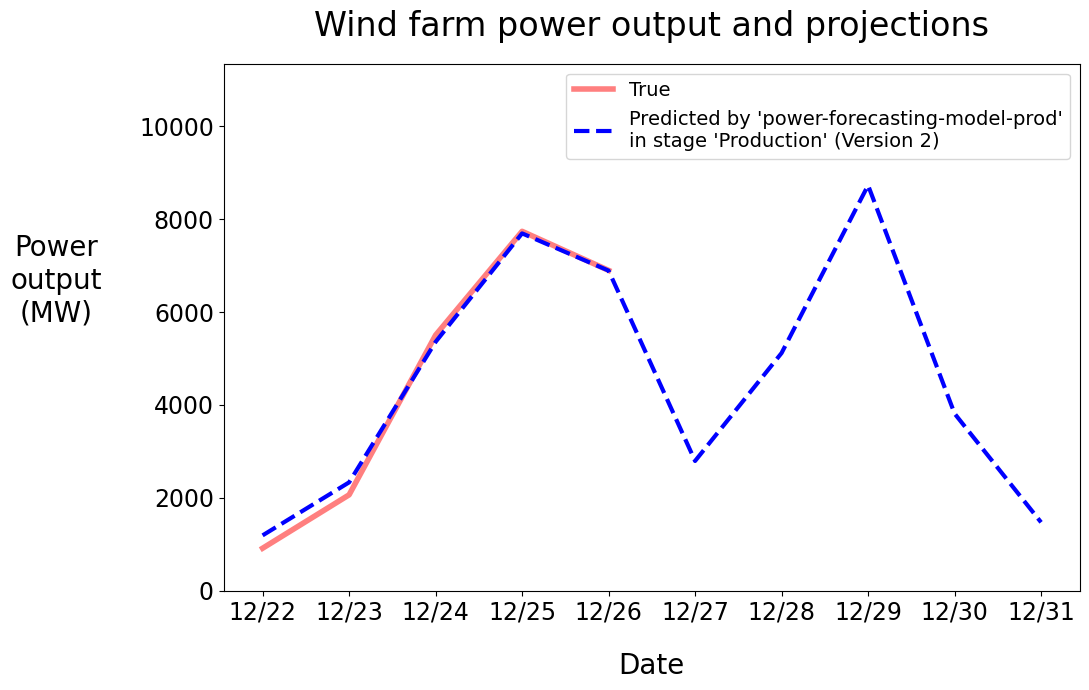

None

In [29]:
forecast_power(model_name, "Production")

In [30]:
from mlflow.tracking.client import MlflowClient

client = MlflowClient()
client.transition_model_version_stage(
  name=model_name,
  version=1,
  stage="Archived",
)

<ModelVersion: aliases=[], creation_timestamp=1696739320374, current_stage='Archived', description=('This model version was built using TensorFlow Keras. It is a feed-forward '
 'neural network with one hidden layer.'), last_updated_timestamp=1696739548707, name='power-forecasting-model-prod', run_id='f78dc11f6a8f44e5ab703e7df1f97cc5', run_link=None, source='file:///content/mlruns/0/f78dc11f6a8f44e5ab703e7df1f97cc5/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [31]:
client.delete_model_version(
 name=model_name,
 version=1,
)

In [32]:
client.transition_model_version_stage(
  name=model_name,
  version=2,
  stage="Archived"
)

client.delete_registered_model(name=model_name)